In [4]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [5]:
try :
    loaded_data = np.loadtxt('./diabetes.csv',delimiter=',')
    
    x_data = loaded_data[:, 0:-1]
    t_data = loaded_data[:, [-1]]

    print(f'x_data.shape = {x_data.shape}')
    print(f't_data.shape = {t_data.shape}')

except Exception as err:

    print(str(err))

x_data.shape = (759, 8)
t_data.shape = (759, 1)


In [6]:
model = Sequential()

model.add(Dense(2, input_shape=(x_data.shape[1],), activation='softmax'))

In [7]:
model.compile(optimizer=SGD(learning_rate=0.01), loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 18        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [8]:
hist = model.fit(x_data, t_data, epochs=500, validation_split=0.2, verbose=2)

Epoch 1/500
19/19 - 1s - loss: 1.1885 - accuracy: 0.3542 - val_loss: 1.1248 - val_accuracy: 0.3487 - 706ms/epoch - 37ms/step
Epoch 2/500
19/19 - 0s - loss: 1.0203 - accuracy: 0.3657 - val_loss: 0.9752 - val_accuracy: 0.3750 - 53ms/epoch - 3ms/step
Epoch 3/500
19/19 - 0s - loss: 0.8941 - accuracy: 0.3839 - val_loss: 0.8652 - val_accuracy: 0.3947 - 49ms/epoch - 3ms/step
Epoch 4/500
19/19 - 0s - loss: 0.8039 - accuracy: 0.4185 - val_loss: 0.7878 - val_accuracy: 0.4013 - 45ms/epoch - 2ms/step
Epoch 5/500
19/19 - 0s - loss: 0.7409 - accuracy: 0.4596 - val_loss: 0.7343 - val_accuracy: 0.4474 - 54ms/epoch - 3ms/step
Epoch 6/500
19/19 - 0s - loss: 0.6975 - accuracy: 0.5272 - val_loss: 0.6972 - val_accuracy: 0.5197 - 48ms/epoch - 3ms/step
Epoch 7/500
19/19 - 0s - loss: 0.6678 - accuracy: 0.5667 - val_loss: 0.6718 - val_accuracy: 0.5724 - 69ms/epoch - 4ms/step
Epoch 8/500
19/19 - 0s - loss: 0.6472 - accuracy: 0.6277 - val_loss: 0.6540 - val_accuracy: 0.6118 - 47ms/epoch - 2ms/step
Epoch 9/500
19

In [9]:
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.7734


[0.47508060932159424, 0.7733860611915588]

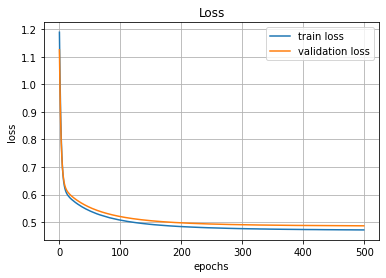

In [10]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

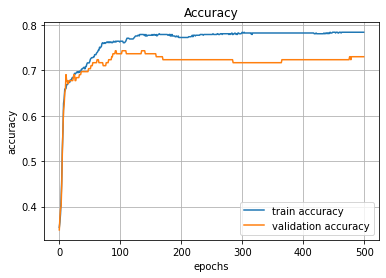

In [11]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()